In [1]:
from scipy.stats import chisquare
from scipy import stats
import urllib.request
import string
import requests
from bs4 import BeautifulSoup
import pandas as pd
import multiprocessing
import gensim
import sys
import spacy
nlp=spacy.load('en')
import seaborn as sns
from nltk.tokenize import WordPunctTokenizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from scipy import spatial
from collections import Counter
import numpy as np
from collections import defaultdict
from pprint import pprint
from gensim import corpora
import re
import logging
import requests
import urllib 
import re
import sys
import zipfile
from glob import glob
import statsmodels.api as sm
import scipy
import scipy.stats as ss
from scipy.signal import savgol_filter
import random
np.set_printoptions(precision=2)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import metrics
from sklearn.cluster import KMeans
# from the demo
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.corpus import names
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
def flushPrint(s):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % s)
    sys.stdout.flush()
    
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0:
        return v
    return v / norm

def cultureD2(model, words):
    cultures = []
    for word in words:
        if (word[0] in model.wv.vocab) & (word[1] in model.wv.vocab):
            cultures.append(normalize(normalize(model[word[0]]) - normalize(model[word[1]])))
        else:
            print(word)
    culturev = normalize(np.mean(cultures, axis=0))
    return culturev

def storyv(model,words):
    veclist=[]
    for w in words:
        if w in model.wv.vocab:
            veclist.append(normalize(model[w]))
    storyv=normalize(np.mean(veclist,axis=0))
    return storyv

def projection(storyv, culturev):
    # cosine similarity
    return (1 - spatial.distance.cosine(storyv, culturev))
           
def cosine2angle(i):
    return np.arccos(i) / np.pi * 180 #长度换角度

def normalized(x):
    x= np.array(x)
    return (x-np.mean(x))/np.std(x)

def normalization(x):
    x=np.array(x)
    return (x-np.min(x))/(np.max(x)-np.min(x))

In [3]:
swords = [
    ['success','failure'],
    ['succeed','fail'],
    ['lucky', 'unlucky'],
    ['fortunate', 'unfortunate'],
    ['happy', 'unhappy'],
    ['glad', 'sad'],
    ['joy', 'sorrow'],
    ['smile', 'tear']
] # success words

In [4]:
# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary=True)

# model = gensim.models.KeyedVectors.load_word2vec_format('english_fiction_sgns_gensim_1990.txt')

2019-05-27 09:56:56,568 : INFO : loading projection weights from GoogleNews-vectors-negative300.bin
2019-05-27 09:58:43,772 : INFO : loaded (3000000, 300) matrix from GoogleNews-vectors-negative300.bin


In [5]:
success_vector = cultureD2(model, swords)
success_word = [i[0] for i in model.similar_by_vector(success_vector, 1)]

2019-05-27 09:58:43,783 : INFO : precomputing L2-norms of word weight vectors


In [80]:
def flushPrint(s):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % s)
    sys.stdout.flush()

In [4]:
import re, sys, getopt

PUNCTUATION = [ch for ch in """(){}[]<>!?.:;,`'"@#$%^&*+-|=~/\\_"""]
LETTERS     = [ch for ch in "abcdefghijklmnopqrstuvwxyz"]
CONSONANTS  = [ch for ch in "bcdfghjklmnpqrstvwxz"] # Need this for Mr. Mss. abbreviations.
WHITESPACE  = [ch for ch in " \t\n\r\f\v"]          # Need this to split words.
DASHES      = [ch for ch in u"鈥撯€�"]                  # Not to be confused with hyphen.

is_uppercase   = lambda s: len(s)>0 and s==s.upper()                          # Goodbye => True
is_capitalized = lambda s: len(s)>0 and s[0].isalpha() and s[0]==s[0].upper() # GOODBYE => True

digits = re.compile("^[0-9]+$")
is_int = lambda s: digits.search(s) != None

# regex pattern for entities: &amp; &#164;
entity = "&[a-z]+;|&#[0-9]+;"

class Range(dict):
    
    def __init__(self, items=[]):
        dict.__init__(self, items)
        self.patterns = []
        
    def __contains__(self, str):
        if dict.__contains__(self, str): 
            return True
        for p in self.patterns:
            if p.search(str) != None: 
                return True
        return False

def in_any(word, ranges=[]):
    for rng in ranges:
        if word in rng: return True
        
abbreviations = [
    "Adm.", "Ala.", "Ariz.", "Ark.", "Aug.", "B.C.", "Bancorp.", "Bhd.", "Brig.", "Bros.", "CO.", 
    "CORP.", "COS.", "ca.", "Calif.", "Capt.", "Cie.", "Cmdr.", "Co.", "Col.", "Colo.", "Conn.", "Corp.", 
    "Cos.", "Cpl.", "D-Mass.", "D.C.", "Dec.", "Del.", "Dept.", "Dr.", "E.g.", "Etc.", "Ex.", "Exch.", 
    "Feb.", "Fla.", "Fri.", "Ga.", "Gen.", "Gov.", "INC.", "Ill.", "Inc.", "Ind.", "Jan.", "Jansz.", 
    "Jos.", "Jr.", "Kan.", "Ky.", "L.A.", "La.", "Lt.", "Ltd.", "Maj.", "Mass.", "Md.", "Messrs.", 
    "Mfg.", "Mich.", "Minn.", "Miss.", "Mo.", "Mon.", "Mr.", "Mrs.", "Ms.", "Mt.", "N.C.", "N.J.", 
    "N.Y.", "NFATc.", "Neb.", "Nev.", "No.", "Nos.", "Nov.", "O.J.", "Oct.", "Okla.", "Ont.", "Ore.", 
    "P.T.", "Pa.", "Ph.", "Prof.", "Prop.", "Pty.", "R.I.", "R.J.", "Rep.", "Reps.", "Rev.", "S.C.", 
    "Sat.", "Sen.", "Sens.", "Sep.", "Sept.", "Sgt.", "Sol.", "Sr.", "St.", "Sun.", "Tenn.", "Tex.", 
    "Thu.", "Tue.", "U.K.", "U.N.", "U.S.", "Va.", "Vt.", "W.J.", "W.Va.", "Wash.", "Wed.", "Wis.", 
    "Wyo.", "a.m.", "cit.", "def.", "ed.", "eds.", "e.g.", "etc.", "ft.", "i.e.", "op.", "p.m.", "pp.", 
    "sc.", "v.", "vs.", "Biol.", "Chem.", "beta4.", "Struct.", "Funct.", "Natl.", "Acad.", "Sci.",
    "Biochem.", "Cell.", "Proc.", "Res.", "Lond.", "Nat.", "Dev.", "Camb.", "Profilin.", "Thymosin-beta4."
]

class Abbreviations(Range):
    
    def __init__(self, known=[]):
        """ A dictionary of known abbreviations, extended with patterns of likely abbreviations.
            word in Abbreviations() == True if word is a known or likely abbreviation.
            Periods in English are ambiguous,
            marking end of sentence, abbreviation, decimal point or ellipsis.
            - Simple rule: "every point is a sentence break" is 93.20% correct for Brown corpus.
            - Fix decimal points: 93,64% correct.
            - Fix single letter abbreviations (T. De Smedt), alternating letters (i.e. U.S.),
              and capital letter followed by consonants (Mr. Assn.): 97.7% correct.
            - Fix with dictionary of known abbreviations: up to 99,07 accuracy.
            http://bulba.sdsu.edu/~malouf/ling571/13-token-bw.pdf
        """
        Range.__init__(self, [(x,True) for x in known])
        self.patterns = [
            re.compile("^[A-Za-z]\.$"),                       # single letter, "T. De Smedt"
            re.compile("^([A-Za-z]\.)+$"),                    # alternating letters, "U.S."
            #re.compile(".+\.[,;]$"),                         # followed by punctuation, "dept.,"
            re.compile("^[A-Z]["+"|".join(CONSONANTS)+"]+.$") # capital followed by consonants, "Mr."
        ]
        
    def __contains__(self, word):
        return word.endswith(".") and Range.__contains__(self, word)

abbreviations = Abbreviations(abbreviations)
# # from https://www.clips.uantwerpen.be/BiographTA/tokenizer.py

In [5]:
def pre_process(data):
    for w in abbreviations:
        data = data.replace(w,' ')
    data = data.replace('\r',' ').replace('\n',' ').replace('\t',' ')
    data = re.split('[.?!]',data) # cut the sentence
    tknzr = WordPunctTokenizer()
    data = [tknzr.tokenize(i) for i in data]
    data=[i for i in data if len(i)>1]
    return data

In [6]:
with open('./stopword.txt','r') as f:
    stopword=f.readlines()
stopword=[i.split('\n')[0] for i in stopword]

In [7]:
# 获取名字，性别数据列表
from nltk.corpus import names
male_names = [name for name in names.words('male.txt')]
female_names = [name for name in names.words('female.txt')]
all_names = male_names+female_names

In [8]:
tknzr = WordPunctTokenizer()

In [9]:
import json
with open("diction.txt","r") as f:
    diction = json.loads(f.readline())

In [242]:
def get_maintext_lines_script(raw_text):
    lines = raw_text.split("\n")
    start_book_i = 0
    end_book_i = len(lines)-1
    if end_book_i == len(lines)-1:
        for j,line in enumerate(lines):
            if "FADE OUT" in line and j>.9*len(lines):
                end_book_i = j
    if end_book_i == len(lines)-1:
        for j,line in enumerate(lines):
            if "THE END" in line and j>.9*len(lines):
                end_book_i = j
    if end_book_i == len(lines)-1:
        for j,line in enumerate(lines):
            if "- END -" in line and j>.9*len(lines):
                end_book_i = j  
    return lines[(start_book_i+1):(end_book_i)]

In [243]:
def chunkify(lines):
    # put them back together...
    raw_text = "\n".join(lines)
    # remove extra whitespace
    raw_text_1 = re.sub("\n[\\s]+?\n","\n\n",raw_text)
    # remove singleton newlines
    raw_text_2 = re.sub(r"([^\n])\n([^\n])",r"\1 \2",raw_text_1)
    raw_text_3 = raw_text_2.rstrip().lstrip()


    # split on those triples (or more)
    big_chunks = re.split("\n\n\n+",raw_text_3)

    big_chunks = [i for i in big_chunks if len(tknzr.tokenize(i))>20] #remove title,author et al.
    
    if len(big_chunks)!=1:
#         print('error chunk!')
        big_chunks = ['\n\n'.join(big_chunks)]
        
    # break into different cuts
    big_chunks = re.split("CUT TO:",big_chunks[0])
#     print(big_chunks)
    # now break them into the paragraphs
    small_chunks = list(map(lambda x: re.split("\n\n",x),big_chunks))
    combined_chunks = []
    [combined_chunks.extend(el) for el in small_chunks]
    combined_chunks = [i for i in combined_chunks if len(i.strip())>0]
#     combined_chunks = ' '.join(combined_chunks)
#     combined_chunks = []

#     for i in range(len(small_chunks)):
#         for j in range(len(small_chunks[i])):
#             combined_chunks.append((i,j,small_chunks[i][j]))
    return combined_chunks
#     return small_chunks

In [244]:
def main_character(lead):
    lead=[i.title() for i in lead]
    film_name_list = (set(lead) & set(male_names)) |\
                    (set(lead) & set(female_names))
    film_script_wordlist_counter = Counter(lead)
    df = pd.DataFrame([[i, film_script_wordlist_counter[i]] for i in film_name_list]\
                                      , columns=['name', 'count'])
    df['gender']=df['name'].apply(lambda x:'male' if x in male_names else 'female')
    df=df.sort_values(by='count', ascending=False)
    lead = df['name'].values[0]
    lead_gender=df['gender'].values[0]
    if lead_gender=='female':
        lead1=df[df['gender']=='male']['name'].values[0]
    else:
        lead1=df[df['gender']=='female']['name'].values[0]
    return lead,lead_gender,lead1

In [10]:
movie_type=pd.read_csv('./movie_type.csv')

In [11]:
name=movie_type['name'].values

In [12]:
def word_to_emotion(data):
    da=tknzr.tokenize(data)
    d=[]
    for word in da:
        try:
            if (word.lower() not in stopword) & (word.title() not in all_names):
                sim = diction[word]
                if (sim<-3)|(sim>3):
                    d.append(sim)
        except:
            pass
    return np.mean(d)

In [254]:
characters=[]
for n in name:
    try:
        f = open('./imsdb/'+n+'.txt',"r")
        rawtext = f.read()
        f.close()
        lines = get_maintext_lines_script(rawtext)
        lines1=[]
        for i in range(len(lines)-1):
            if (0<len(tknzr.tokenize(lines[i]))<4):
                if (tknzr.tokenize(lines[i])[-1][-1] not in string.punctuation) & (len(tknzr.tokenize(lines[i]))>0):
                    if lines[i+1]!='':
                        lines1.append(lines[i]+'\n\n')
                    else:
                        lines1.append(lines[i])
            else:
                lines1.append(lines[i])
        chunked = chunkify(lines1)
        lead_role=[]
        for i,c in enumerate(chunked):
            t=[i.lower() for i in tknzr.tokenize(c)]
            if (t[-1][-1] not in string.punctuation) & (len(t)<4):
                lead_role.extend(t)
        lead,lead_gender,lead1=main_character(lead_role)
        common=[]
        for i,c in enumerate(chunked):
            t=[i.lower() for i in tknzr.tokenize(c)]
            if t[-1][-1] in string.punctuation:
                if (lead.lower() in t)&(lead1.lower() in t):
                    common.append(i)
        
        common1=[]
        for i,c in enumerate(chunked):
            t=[i.lower() for i in tknzr.tokenize(c)]
            if t[-1][-1] not in string.punctuation:
                common1.append([i,t])
                
        a=[]
        t=4
        for i in range(1,len(common1)-1):
            if (lead.lower() in common1[i][1])&(lead1.lower() in common1[i-1][1]):
                if (common1[i+1][0]-common1[i][0])<t: #4 is a threshold of dialoge length
                    a.extend([j for j in range(common1[i-1][0],common1[i+1][0])])
                else:
                    a.extend([j for j in range(common1[i-1][0],common1[i][0]+t)])
            if (lead.lower() in common1[i-1][1])&(lead1.lower() in common1[i][1]):
                if (common1[i+1][0]-common1[i][0])<t: #4 is a threshold of dialoge length
                    a.extend([j for j in range(common1[i-1][0],common1[i+1][0])])
                else:
                    a.extend([j for j in range(common1[i-1][0],common1[i][0]+t)])
            if (lead.lower() in common1[i][1])&(lead1.lower() in common1[i][1]):
                a.extend([common1[i][0]])
        a=a+common
        a=sorted(list(set(a)))
        
        d=pd.DataFrame()
        d['sentence']=chunked
        d['index']=d.index
        d['tp']=d['index'].apply(lambda x: 'yes' if x in a else np.nan)
        d['include']=d['sentence'].apply(lambda x: 'no' if ([i.lower() for i in tknzr.tokenize(x)][-1][-1] \
                        not in string.punctuation) & (len([i.lower() for i in tknzr.tokenize(x)])<6) else 'yes')    
        d=d[d['include']=='yes']
        d=d.reset_index(drop=False)
        tp=d[d['tp']=='yes'].index
        d['emotion']=d['sentence'].apply(lambda x: word_to_emotion(x))
        w=d['emotion'].values
        w=[0 if np.isnan(i)==True else i for i in w]
        characters.append([n,lead,lead_gender,lead1,tp,w])
    except Exception as e:
        print(e,n)
        pass

/home/sysadmin/anaconda3/lib/python3.6/site-packages/pandas/core/ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


invalid type comparison 12-Monkeys


/home/sysadmin/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


[Errno 2] No such file or directory: './imsdb/48-Hrs.txt' 48-Hrs
invalid type comparison 9
invalid type comparison Adaptation
invalid type comparison Adventures-of-Buckaroo-Banzai-Across-the-Eighth-Dimension,-The
[Errno 2] No such file or directory: './imsdb/After.txt' After
index 0 is out of bounds for axis 0 with size 0 Aladdin
invalid type comparison Alien-3
[Errno 2] No such file or directory: './imsdb/Alien-vs.txt' Alien-vs
invalid type comparison All-the-President's-Men
invalid type comparison Amadeus
invalid type comparison American-Psycho
index 0 is out of bounds for axis 0 with size 0 American-Shaolin-King-of-Kickboxers-II
invalid type comparison American-Werewolf-in-London
invalid type comparison Angels-&-Demons
invalid type comparison Anna-Karenina
index 0 is out of bounds for axis 0 with size 0 Antz
index 0 is out of bounds for axis 0 with size 0 Arcade
invalid type comparison Armageddon
invalid type comparison Bad-Lieutenant
index 0 is out of bounds for axis 0 with size 0 

invalid type comparison Star-Wars-Attack-of-the-Clones
index 0 is out of bounds for axis 0 with size 0 Star-Wars-Revenge-of-the-Sith
index 0 is out of bounds for axis 0 with size 0 Star-Wars-The-Phantom-Menace
index 0 is out of bounds for axis 0 with size 0 Station-West
invalid type comparison Sting,-The
invalid type comparison Storytelling
[Errno 2] No such file or directory: './imsdb/Sunset-Blvd.txt' Sunset-Blvd
invalid type comparison Suspect-Zero
invalid type comparison Swordfish
index 0 is out of bounds for axis 0 with size 0 Taking-Lives
invalid type comparison Taking-of-Pelham-One-Two-Three,-The
[Errno 2] No such file or directory: './imsdb/Talented-Mr.txt' Talented-Mr
index 0 is out of bounds for axis 0 with size 0 Thing,-The
index 0 is out of bounds for axis 0 with size 0 Three-Kings-(Spoils-of-War)
index 0 is out of bounds for axis 0 with size 0 Time-Machine,-The
invalid type comparison Tinker-Tailor-Soldier-Spy
invalid type comparison Tomorrow-Never-Dies
invalid type compari

In [436]:
len(characters)

915

In [466]:
file=[i[0] for i in characters]
emotion=[i[-1] for i in characters]
tp=[i[-2].values for i in characters]
character=[i[1:4] for i in characters]

diction1=dict(zip(file,tp))
diction2=dict(zip(file,emotion))
diction3=dict(zip(file,character))

movie_type['tp']=movie_type['name'].apply(lambda x: diction1[x] if x in diction1 else np.nan)
movie_type['emotion']=movie_type['name'].apply(lambda x: diction2[x] if x in diction2 else np.nan)
movie_type['character']=movie_type['name'].apply(lambda x: diction3[x] if x in diction3 else np.nan)

movie_type.to_csv('./movie_type_e2.csv',index=False)

In [13]:
movie_type=pd.read_csv('./movie_type_e2.csv')

In [14]:
len(movie_type)

915

In [15]:
def tp_eval(x):
    try:
        if type(x)==str:
            return [eval(i) for i in x.replace('\n','').replace('[','').replace(']','').split(' ') if i!='']
        else:
            return [i for i in x.replace('\n','').replace('[','').replace(']','').split(' ') if i!='']
    except:
        return x

In [16]:
movie_type['tp']=movie_type['tp'].apply(lambda x: tp_eval(x))

In [17]:
def eval_(x):
    try:
        return eval(x)
    except:
        return np.nan
        pass

# movie_type['tp']=movie_type['tp'].apply(lambda x: eval_(x))

movie_type['emotion']=movie_type['emotion'].apply(lambda x: eval_(x))

In [18]:
movie_type['character']=movie_type['character'].apply(lambda x: eval_(x))

In [19]:
movie_type['lead_gender']=movie_type['character'].apply(lambda x: x[1] if type(x)==list else np.nan)

In [20]:
movie_type=movie_type.dropna(axis=0,how='any',subset=['lead_gender','tp','emotion'])

In [21]:
len(movie_type)

915

In [22]:
# movie_type.to_csv('./movie_long.csv',index=False)

In [23]:
movie_type['lead_gender'].values[0]

'Celeste'

### acompany

In [30]:
movie_type=pd.read_csv('./movie_type_e2.csv')

In [31]:
def eval_(x):
    try:
        return eval(x)
    except:
        return np.nan
        pass

movie_type['tp']=movie_type['tp'].apply(lambda x: eval_(x))
movie_type['character']=movie_type['character'].apply(lambda x: eval_(x))
movie_type['emotion']=movie_type['emotion'].apply(lambda x: eval_(x))

In [32]:
movie_type['co_n']=movie_type['tp'].apply(lambda x: len(x))

In [33]:
movie_type['len_p']=movie_type['emotion'].apply(lambda x: len(x))

In [34]:
movie_type['prob']=movie_type['co_n']/movie_type['len_p']

In [106]:
movie_type1=movie_type[movie_type['co_n']>=11]

In [107]:
male=movie_type1[(movie_type1['lead_gender']=='male')]
female=movie_type1[(movie_type1['lead_gender']=='female')]

In [108]:
male['prob'].describe()

count    607.000000
mean       0.105578
std        0.085084
min        0.005553
25%        0.041276
50%        0.085540
75%        0.149515
max        0.446908
Name: prob, dtype: float64

In [109]:
male['prob'].sem()

0.003453460450487416

In [110]:
female['prob'].describe()

count    190.000000
mean       0.119438
std        0.095192
min        0.006471
25%        0.039829
50%        0.094763
75%        0.177963
max        0.451299
Name: prob, dtype: float64

In [111]:
female['prob'].sem()

0.006905923456519293

In [112]:
v,p=stats.ttest_ind([i for i in male['prob'].values], [i for i in female['prob'].values])
p

0.057349574963749546

In [84]:
len(movie_type)

912

In [675]:
def first_meeting(x,y):
    try:
        return x[y[0]-1]
    except:
        return np.nan

In [676]:
movie_type['first_meeting']=movie_type.apply(lambda row: first_meeting(row.cum_e,row.tp),axis=1)

In [678]:
movie_type=movie_type.dropna(axis=0,how='any',subset=['first_meeting'])

In [679]:
male=movie_type[(movie_type['lead_gender']=='male')]
female=movie_type[(movie_type['lead_gender']=='female')]

In [684]:
male=movie_type[(movie_type['lead_gender']=='male')&movie_type['type'].str.contains('Romance')]
female=movie_type[(movie_type['lead_gender']=='female')&movie_type['type'].str.contains('Romance')]

In [685]:
male['first_meeting'].describe()

count    81.000000
mean     -3.380332
std      18.823124
min     -68.650092
25%     -10.020354
50%      -2.483307
75%       2.336963
max      54.436297
Name: first_meeting, dtype: float64

In [686]:
female['first_meeting'].describe()

count    49.000000
mean     -3.725187
std      26.302315
min     -89.720115
25%     -13.314656
50%      -4.142785
75%       9.862794
max      76.140776
Name: first_meeting, dtype: float64

In [687]:
v,p=stats.ttest_ind([i for i in male['first_meeting'].values], [i for i in female['first_meeting'].values])
v,p

(0.08689389630619679, 0.9308916375336826)

In [45]:
movie_type['cum_e']=movie_type['emotion'].apply(lambda x: np.cumsum(normalized(x)))

In [629]:
# movie_type['cum_e']=movie_type['cum_e'].apply(lambda x:normalization(x))

In [46]:
def smooth(x):
    a=0.3
    t=[int(len(x)*a)+1 if int(len(x)*a)%2==0 else int(len(x)*a)][0]
    p=[2 if t>2 else 0][0]
    return savgol_filter(x, t, p)

In [47]:
movie_type['smooth_cum_e']=movie_type['cum_e'].apply(lambda x: smooth(x))

/home/sysadmin/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [632]:
# movie_type['norm_len']=movie_type['len_p'].apply(lambda x:normalization(range(int(x))))

In [48]:
def is_arithmetic(l): 
    if len(l)==1:
        return True
    else:
        delta = l[1] - l[0]  
        for index in range(len(l) - 1):  
            if not (np.sign(l[index + 1] - l[index]) == np.sign(delta)):  
                 return False  
    return True  

In [49]:
def extreme_v(nums):
    peaks = []
    troughs = []
    t=0
    num1=[i[0] for i in nums]
    num2=[i[1] for i in nums]
    for idx in range(1, len(num1)-1):
        if num2[idx-1]+t < num2[idx] > num2[idx+1]+t:
            peaks.append([num1[idx],num2[idx]])
        if num2[idx-1] > num2[idx]+t < num2[idx+1]:
            troughs.append([num1[idx],num2[idx]])
    a=sorted(peaks+troughs,key=lambda x: x[0])
    a=[nums[0]]+a+[nums[-1]]
    b=[a[i+1] for i in range(1,len(a)-1) if (a[i+1][0]-a[i][0]==1)&(abs(a[i+1][1]-a[i][1])<t)]
    a=[i for i in a if i not in b]
#     print(a)
    return a

In [50]:
def t_p(nums):
    try:
        peaks = []
        troughs = []
        for idx in range(1, len(nums)-1):
            if nums[idx-1] < nums[idx] > nums[idx+1]:
                peaks.append(idx)
            if nums[idx-1] > nums[idx] < nums[idx+1]:
                troughs.append(idx)
        if len(peaks)<len(troughs):
            peaks=peaks+[len(nums)-1]
        elif len(peaks)>len(troughs):
            troughs=[0]+troughs
        else:
            if peaks[0]<troughs[0]:
                peaks=peaks+[len(nums)-1]
                troughs=[0]+troughs
        a=[[i,nums[i]] for i in troughs]
        b=[[i,nums[i]] for i in peaks]
        c=[i for i in list(zip(a,b))]
        return c
    except  Exception as e:
        return np.nan
        pass

In [51]:
movie_type['t_p']=movie_type['smooth_cum_e'].apply(lambda x: t_p(x))

In [52]:
def tp_e(cum_e,tp):
    try:
        tp_e=[[i,cum_e[i]] for i in tp]
        return tp_e
    except Exception as e:
        print(type(tp))
        print(tp)
        print(e)
        return np.nan

In [53]:
movie_type['tp_e']=movie_type.apply(lambda row: tp_e(row.cum_e,row.tp),axis=1)

In [54]:
def tp_c(tp_e,w): #non-normalize
    try:
        a=[]
        for i in range(len(tp_e)-1):
            if (tp_e[i+1][0]-tp_e[i][0])>len(w)/15:
                a.append(i+1)

        a=[0]+a+[len(tp_e)]

        b=[]
        for i in range(len(a)-1):
            if is_arithmetic([i[1] for i in tp_e[a[i]:a[i+1]]])==True:
                b.append(tp_e[a[i]:a[i+1]])
            else:
                extreme=extreme_v(tp_e[a[i]:a[i+1]])
                index=[tp_e.index(i) for i in extreme]
        #         print([i[0] for i in extreme])
                q=index[0]
                for j in range(1,len(index)-1):
                    if (tp_e[index[j]][0]-tp_e[index[j]-1][0])>=(tp_e[index[j]+1][0]-tp_e[index[j]][0]):
                        b.append(tp_e[q:index[j]])
                        q=index[j]
                    else:
                        b.append(tp_e[q:index[j]+1])
                        q=index[j]+1
                b.append(tp_e[q:index[-1]+1])

        b=[i for i in b if len(i)!=0]

        for i in range(len(b)-1):
            if (len(b[i])==1)&(b[i+1][0][0]-b[i][0][0]==1):
                b[i+1]=b[i]+b[i+1]
                b[i]=[]
        b=[i for i in b if len(i)!=0]
        if len(b)>1:
            if (len(b[-1])==1)&(b[-1][0][0]-b[-2][-1][0]==1):
                b[-2]=b[-2]+b[-1]
                b[-1]=[]
            b=[i for i in b if len(i)!=0]
        return b
        
    except Exception as e:
        return np.nan
        pass

In [55]:
movie_type['tp_c']=movie_type.apply(lambda row: tp_c(row.tp_e,row.emotion),axis=1)

In [56]:
def k(b):
    try:
        a=[]
        for i in b:
            if len(i)==0:
                continue
            if len(i)==1:
                a.append([0,1])
            if len(i)>1:
                x=[j[0] for j in i] #non_normalize
                y=[j[1] for j in i] #non_normalize
                poly = np.polyfit(x,y,deg=1)
                a.append([poly[0],[x[0],x[-1]]])
#                 a.append([poly[0],len(x)]) #number
#                 a.append([poly[0],x[-1]-x[0]]) #length
#                 a.append(poly[0])
        return a
    except Exception as e:
        return np.nan
        pass
movie_type['k']=movie_type['tp_c'].apply(lambda x: k(x))

In [58]:
movie_type=movie_type.dropna(axis=0,how='any',subset=['k'])

In [59]:
def up(x):
    b=[]
    for i in x:
        b.extend(range(i[0],i[1]+1))
    return b

In [60]:
movie_type['up']=movie_type['k'].apply(lambda x: [i[1] for i in x if i[0]>0])

In [61]:
movie_type['up']=movie_type['up'].apply(lambda x: up(x))

In [63]:
movie_type.to_csv('./movie_type_e2.csv',index=False)

In [642]:
# def k(b,l):
#     try:
#         a=[]
#         for i in b:
#             if len(i)==0:
#                 continue
#             if len(i)==1:
#                 a.append([0,(l[-1]-l[-2])/2])
#             if len(i)>1:
#                 x=[l[j[0]] for j in i] #normalize
#                 y=[j[1] for j in i] 
#                 poly = np.polyfit(x,y,deg=1)
# #                 a.append([poly[0],len(x)]) #number
#                 a.append([poly[0],x[-1]-x[0]]) #length
# #                 a.append(poly[0])
#         return a
#     except Exception as e:
# #         print(e)
#         return np.nan
#         pass

# movie_type['k']=movie_type.apply(lambda row: k(row.tp_c,row.norm_len),axis=1)

In [643]:
movie_type1=movie_type.dropna(axis=0,how='any',subset=['k'])

In [644]:
len(movie_type1)

913

In [645]:
def max_(x):
    try:
        return np.max([i[0]*i[1] for i in x if i[0]>0])
#         return np.max([i[0] for i in x if i[0]>0])
    except:
        return 0
        
def min_(x):
    try:
        return np.min([i[0]*i[1] for i in x if i[0]<0])
#         return np.min([i[0] for i in x if i[0]<0])
    except:
        return 0

In [669]:
# IMDB1['trend']=IMDB1['k'].apply(lambda x: [i[0]*i[1] for i in x if i!=0])
# IMDB1['trend']=IMDB1['k'].apply(lambda x: x[0][0]*x[0][1])
# IMDB1['trend']=IMDB1['k'].apply(lambda x: np.sum([i[0]*i[1] for i in x if i!=0])/np.sum([i[1] for i in x if i!=0]))
# movie_type1['trend']=movie_type1['k'].apply(lambda x: np.sum([i[0]*i[1] for i in x if i!=0])/len(x))
movie_type1['trend']=movie_type1['k'].apply(lambda x: max_(x))
movie_type1['trend1']=movie_type1['k'].apply(lambda x: min_(x))
# IMDB1['trend']=IMDB1['k'].apply(lambda x: np.sum([abs(i[0]*i[1]) for i in x])/np.sum([i[1] for i in x]))
# IMDB1['trend1']=IMDB1['k'].apply(lambda x: np.sum([abs(i[0]*i[1]) for i in x if i[0]>0])/np.sum([i[1] for i in x if i[0]>0]))
# IMDB1['trend2']=IMDB1['k'].apply(lambda x: np.sum([abs(i[0]*i[1]) for i in x if i[0]<0])/np.sum([i[1] for i in x if i[0]<0]))
# movie_type1['trend']=movie_type1['k'].apply(lambda x: np.sum([abs(i[0]*i[1]) for i in x])/len([i[1] for i in x]))
# movie_type1['K']=movie_type1['k'].apply(lambda x: np.std([i[0] for i in x]))
# movie_type1['trend']=movie_type1['k'].apply(lambda x: np.sum([abs(i[0]) for i in x])/len([i for i in x]))
# movie_type1['trend1']=movie_type1['k'].apply(lambda x: np.sum([abs(i[0]) for i in x if i[0]>0])/len([i for i in x if i[0]>0]))
# movie_type1['trend2']=movie_type1['k'].apply(lambda x: np.sum([abs(i[0]) for i in x if i[0]<0])/len([i for i in x if i[0]<0]))
# movie_type1['K']=movie_type1['k'].apply(lambda x: np.std([i[0]*i[1] for i in x]))
# movie_type1['trend']=movie_type1['k'].apply(lambda x: np.sum([abs(i[0]*i[1]) for i in x])/len([i[1] for i in x]))
# movie_type1['trend1']=movie_type1['k'].apply(lambda x: np.sum([abs(i[0]*i[1]) for i in x if i[0]>0])/len([i[1] for i in x if i[0]>0]))
# movie_type1['trend2']=movie_type1['k'].apply(lambda x: np.sum([abs(i[0]*i[1]) for i in x if i[0]<0])/len([i[1] for i in x if i[0]<0]))

/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [648]:
def biggest_p (x):
    try:
        a=[]
        for i in x:
            a.append(i[1][0]-i[0][0])
        m=np.argmax(a)
        return [x[m][0][0],x[m][1][0]]
    except Exception as e:
        return np.nan

In [649]:
movie_type1['biggest_p']=movie_type1['t_p'].apply(lambda x:biggest_p(x))

/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [650]:
def happy_p(x,y,z):
    try:
        c=[i[0][0] for i in z if len(i)==1]
        a=x[0]
        b=x[1]
        return len([i for i in y if (a<i<=b) & (i not in c)])
#         return len([i for i in y if a<i<b])/len(y)
#         return len([i for i in y if a<=i<=b])
    except:
        return np.nan
        pass

In [651]:
movie_type1['happy_p']=movie_type1.apply(lambda row: happy_p(row.biggest_p,row.tp,row.tp_c),axis=1)

/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [652]:
movie_type1['happy_l']=movie_type1['biggest_p'].apply(lambda x: (x[1]-x[0]) if type(x)==list else np.nan)

/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [653]:
movie_type1['real_exp']=movie_type1['happy_p']-movie_type1['prob']*movie_type1['happy_l']

/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [654]:
movie_type1['real']=movie_type1['happy_p']
movie_type1['exp']=movie_type1['prob']*movie_type1['happy_l']

/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [655]:
len(movie_type1)

913

In [656]:
movie_type1[movie_type1['name']=='Titanic']['real_exp']

1013    100.188017
Name: real_exp, dtype: float64

In [463]:
movie_type1[movie_type1['name']=='Jane-Eyre']['real_exp']

558    55.37913
Name: real_exp, dtype: float64

In [464]:
movie_type1[movie_type1['name']=='12-Years-a-Slave']['real_exp']

1   -8.485269
Name: real_exp, dtype: float64

In [465]:
# male=movie_type1[(movie_type1['lead_gender']=='male')&(movie_type1['type'].str.contains('Romance'))]
# female=movie_type1[(movie_type1['lead_gender']=='female')&(movie_type1['type'].str.contains('Romance'))]

In [670]:
male=movie_type1[(movie_type1['lead_gender']=='male')]
female=movie_type1[(movie_type1['lead_gender']=='female')]

In [671]:
len(male),len(female)

(689, 224)

In [468]:
import numpy as np
from scipy import stats
from scipy.stats import chisquare        
list_observe=[i for i in female['real'].values]
list_expect=[i for i in female['exp'].values]
 
chisquare(f_obs=list_observe, f_exp=list_expect)

Power_divergenceResult(statistic=2964.5906299393437, pvalue=0.0)

In [469]:
import numpy as np
from scipy import stats
from scipy.stats import chisquare        
list_observe=[i for i in male['real'].values]
list_expect=[i for i in male['exp'].values]
 
chisquare(f_obs=list_observe, f_exp=list_expect)

Power_divergenceResult(statistic=10450.070027075713, pvalue=0.0)

In [470]:
male['real_exp'].describe()

count    689.000000
mean       2.102012
std       27.036768
min     -169.105642
25%      -10.163462
50%       -0.356729
75%       11.111732
max      112.748634
Name: real_exp, dtype: float64

In [471]:
female['real_exp'].describe()

count    224.000000
mean       3.952829
std       24.709246
min      -69.801414
25%       -7.945792
50%       -0.525806
75%       13.031923
max      100.188017
Name: real_exp, dtype: float64

In [472]:
v,p=stats.ttest_ind([i for i in male['real_exp'].values], [i for i in female['real_exp'].values])
p

0.36383069518077893

In [473]:
# m=[i for i in male['k'].values]
# f=[i for i in female['k'].values]
# for j in m:
#     sns.kdeplot([q[0] for q in j], bw=0.5,color='blue')
# for j in f:
#     sns.kdeplot([q[0] for q in j], bw=0.5,color='red')
# plt.ylabel('Probability',fontsize=15)
# plt.title('Movie (long) ',fontsize=20)

In [657]:
# sns.set(style="whitegrid")
sns.set(rc={"font.style":"normal",
#             "axes.facecolor":bg_color,
#             "figure.facecolor":bg_color,
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":False,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':15,
            'font.size':20,
            'ytick.labelsize':10})

/home/sysadmin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


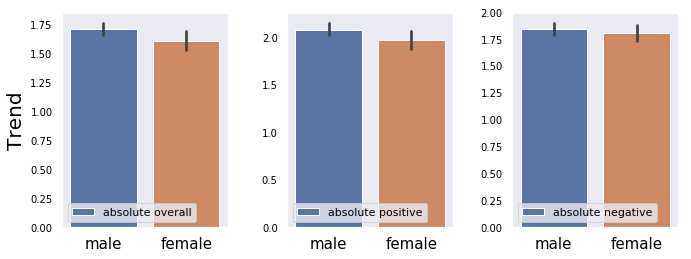

In [668]:
fig = plt.figure(figsize=(10,4))
ax=fig.add_subplot(1,3,1)
sns.barplot(x='lead_gender',y='trend',data = movie_type1,label='absolute overall')
ax.set_xlabel(None,fontsize=20)
ax.set_ylabel('Trend',fontsize=20)
plt.legend()
ax=fig.add_subplot(1,3,2)
sns.barplot(x='lead_gender',y='trend1',data = movie_type1,label='absolute positive')
ax.set(ylabel=None,xlabel=None)
plt.legend()
ax=fig.add_subplot(1,3,3)
sns.barplot(x='lead_gender',y='trend2',data = movie_type1,label='absolute negative')
ax.set(ylabel=None,xlabel=None)
plt.legend()
plt.tight_layout()
plt.show()

In [664]:
male['K'].describe()

count    689.000000
mean       2.189538
std        0.835009
min        0.000000
25%        1.831925
50%        2.327311
75%        2.681132
max        5.807827
Name: K, dtype: float64

In [665]:
female['K'].describe()

count    224.000000
mean       2.069932
std        0.824158
min        0.000000
25%        1.900353
50%        2.283326
75%        2.551853
max        4.104631
Name: K, dtype: float64

In [666]:
v,p=stats.ttest_ind([i for i in male['K'].values], [i for i in female['K'].values])
p

0.06204777901460332

/home/sysadmin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


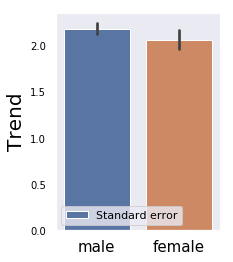

In [667]:
fig = plt.figure(figsize=(10,4))
ax=fig.add_subplot(1,3,1)
sns.barplot(x='lead_gender',y='K',data = movie_type1,label='Standard error')
ax.set_xlabel(None,fontsize=20)
ax.set_ylabel('Trend',fontsize=20)
plt.legend()

In [674]:
movie_type1[movie_type1['name']=='Titanic']

,name,ending,type,IMSDb_rating,User_rating,Release_date,Script_date,gender,ending_10,vec,wordvec,wordvec100,wordvec200,mode,ending_100,positive1,negative1,overall,count,len,tp,emotion,character,lead_gender,co_n,len_p,prob,cum_e,smooth_cum_e,norm_len,t_p,tp_e,tp_c,k,K,trend,trend1,trend2,biggest_p,happy_p,happy_l,real_exp,real,exp
1013,Titanic,0.0,"Drama,Romance,nan,nan,nan,nan,nan",NaN,8.02,NaN,1997.0,1.0,0.0,"[6.6855454545454505, 6.821111111111105, 6.6536...","[11.307730492605003, -0.7205430117394371, 10.9...","[14.956624680212244, 14.956624680212244, 14.95...","[8.23082187576179, 12.77271117249029, 14.95662...",-1.0,0.0,"[8.657915364887568, 8.820793189154038, 9.06785...","[-7.028320461450602, -6.863868231968566, -7.47...","[0.5910918173241869, 0.6526220046905217, 0.828...",39842.0,4500.0,"[479, 482, 483, 500, 505, 506, 507, 508, 509, ...","[3.595249255956679, 3.857720104487779, 1.63964...","[Rose, female, Jack]",female,445,2420,0.183884,"[0.21004554098304495, 0.4893768641865141, 0.18...","[8.472556042499917, 8.39602775306718, 8.319693...","[0.0, 0.00041339396444811904, 0.00082678792889...","[([468, -10.633487040162436], [469, -10.631493...","[[479, -5.207362721877825], [482, -4.564424163...","[[[479, -5.207362721877825], [482, -4.56442416...","[[0.19632525375813742, 3], [0, 1], [0.53869457...",2.239948,7.573866,-7.239835,1.679874,"[482, 1139]",221,657,100.188017,221,120.811983


/home/sysadmin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


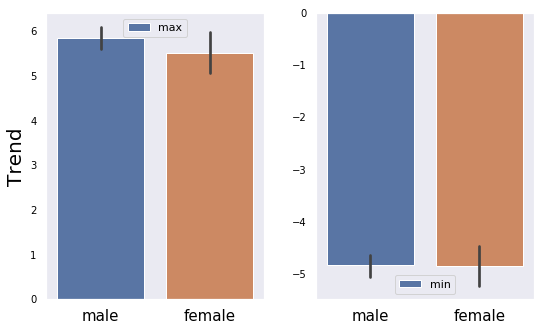

In [672]:
fig = plt.figure(figsize=(8,5))
ax=fig.add_subplot(1,2,1)
sns.barplot(x='lead_gender',y='trend',data = movie_type1,label='max')
ax.set_xlabel(None,fontsize=20)
ax.set_ylabel('Trend',fontsize=20)
plt.legend()
ax=fig.add_subplot(1,2,2)
sns.barplot(x='lead_gender',y='trend1',data = movie_type1,label='min')
# plt.yscale('log')
# plt.yticks([-5,5])
ax.set(ylabel=None,xlabel=None)
plt.legend()
plt.tight_layout()
plt.show()